In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Telecom_Customer_Churn_Analysis.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present.

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


skewness present in SeniorCitizen and tenure.

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['TotalCharges']=le.fit_transform(df['TotalCharges'])
df['Churn']=le.fit_transform(df['Churn'])

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [18]:
df.drop('customerID',axis=1,inplace=True)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [20]:
df_cor=df.corr()
df_cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


churn is highly correlate with monthly_charges.
churn is least correlate with Contract.

<AxesSubplot:>

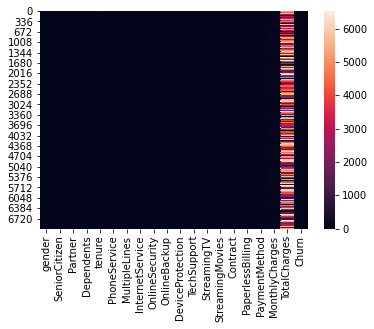

In [21]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

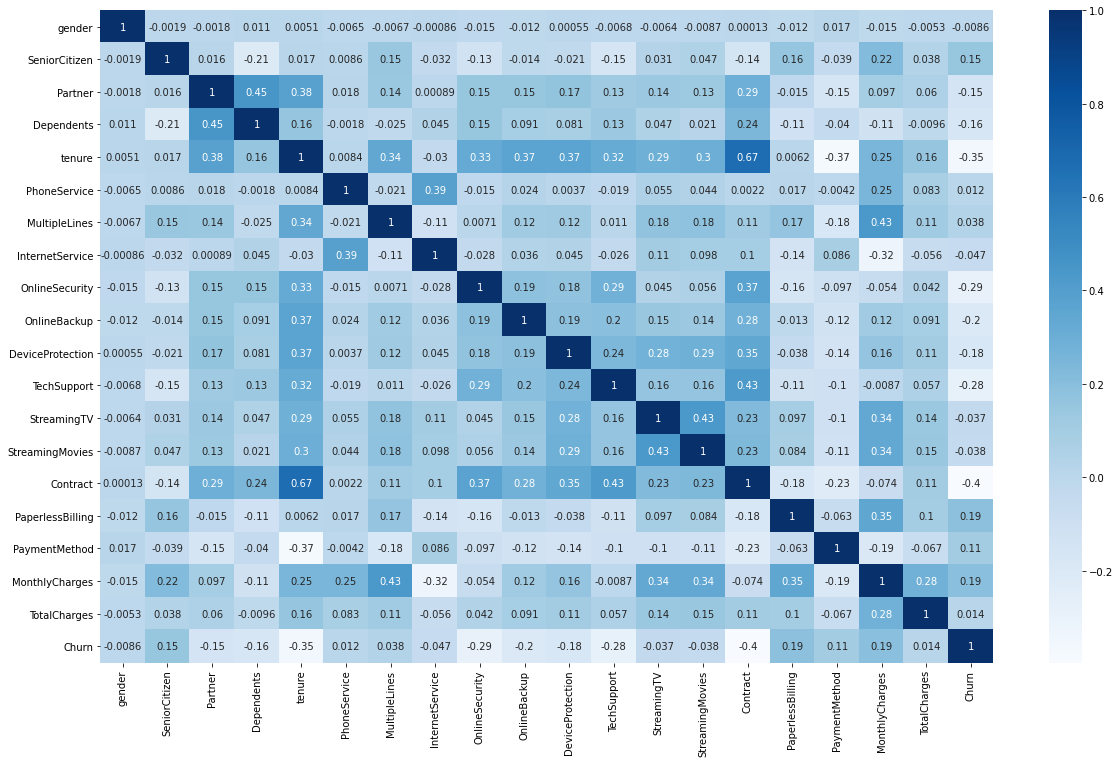

In [26]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

churn is highly correlate with paperlessBilling and MonthlyCharges.
churn is least correlate with Contract.

<AxesSubplot:>

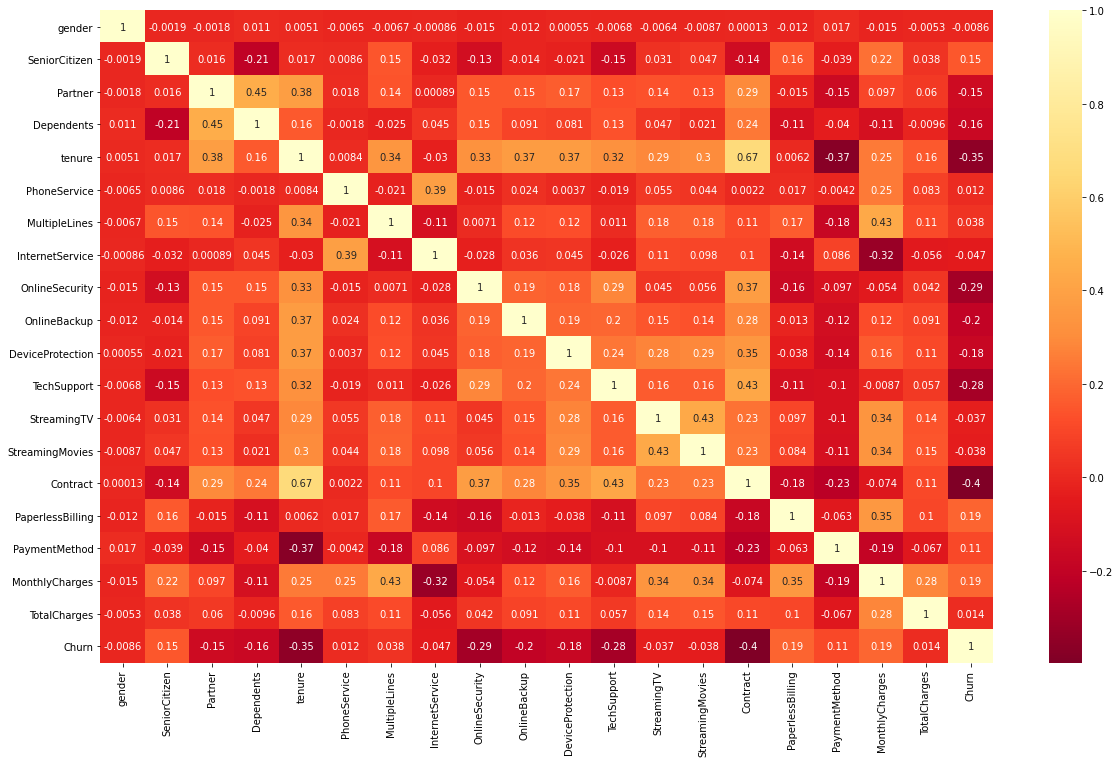

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

churn is highly correlate with paperlessBilling and MonthlyCharges.
churn is least correlate with Contract,tenure and onlineSecurity.

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='Density'>

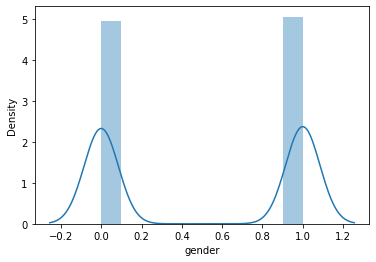

In [29]:
sns.distplot(df['gender'])

No skewness present.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

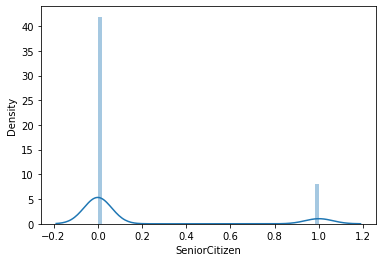

In [30]:
sns.distplot(df['SeniorCitizen'])

skewness present.

<AxesSubplot:xlabel='Partner', ylabel='Density'>

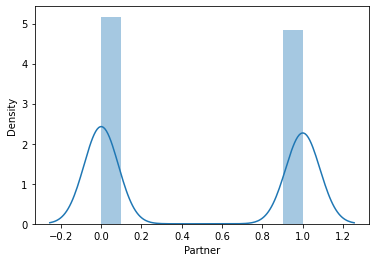

In [31]:
sns.distplot(df['Partner'])

No skewness present.

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

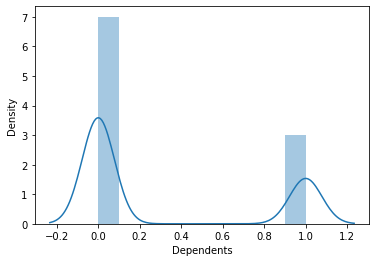

In [32]:
sns.distplot(df['Dependents'])

skewness present.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

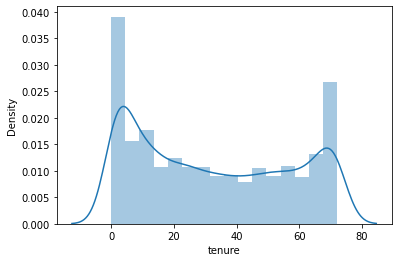

In [33]:
sns.distplot(df['tenure'])

NO skewness present.

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

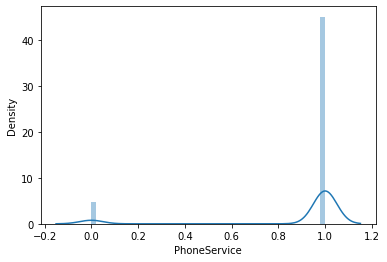

In [34]:
sns.distplot(df['PhoneService'])

skewness present.

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

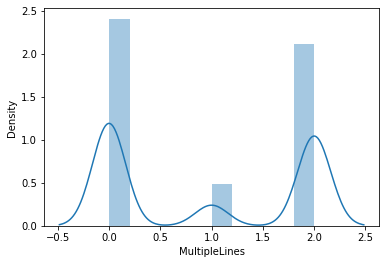

In [35]:
sns.distplot(df['MultipleLines'])

No skewness present.

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

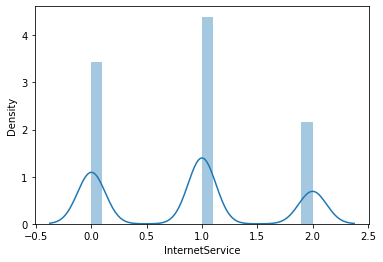

In [36]:
sns.distplot(df['InternetService'])

NO skewness present.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

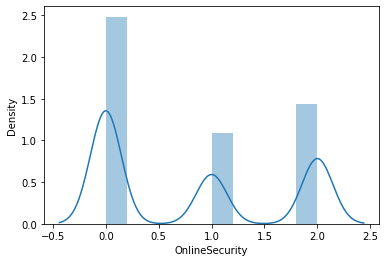

In [37]:
sns.distplot(df['OnlineSecurity'])

NO skewness present.

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

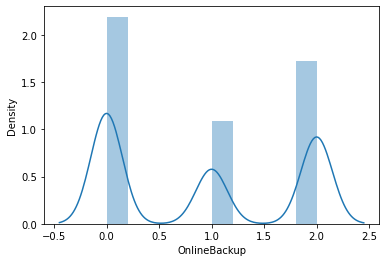

In [38]:
sns.distplot(df['OnlineBackup'])

NO skewness present.

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

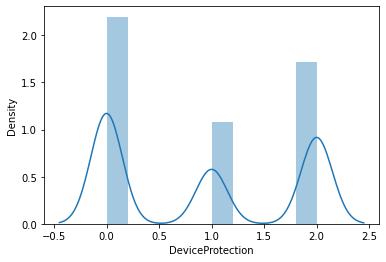

In [39]:
sns.distplot(df['DeviceProtection'])

NO skewness present.

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

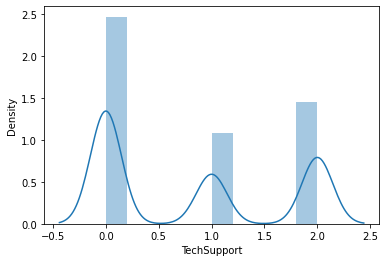

In [40]:
sns.distplot(df['TechSupport'])

NO skewness present.

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

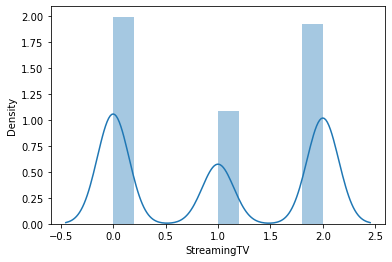

In [41]:
sns.distplot(df['StreamingTV'])

NO skewness present.

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

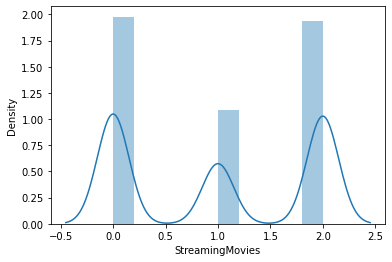

In [42]:
sns.distplot(df['StreamingMovies'])

NO skewness present.

<AxesSubplot:xlabel='Contract', ylabel='Density'>

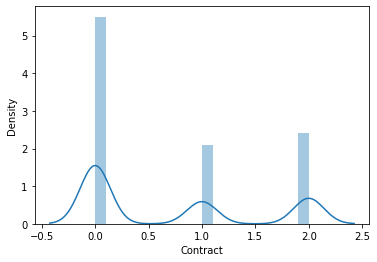

In [43]:
sns.distplot(df['Contract'])

skewness present.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

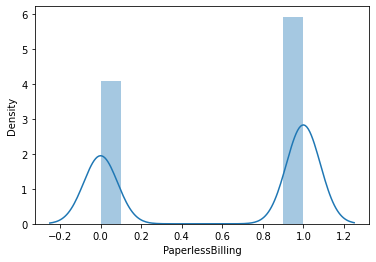

In [44]:
sns.distplot(df['PaperlessBilling'])

skewness present.

<AxesSubplot:xlabel='PaymentMethod', ylabel='Density'>

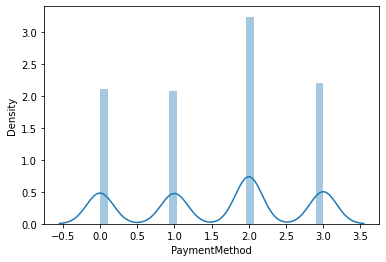

In [45]:
sns.distplot(df['PaymentMethod'])

skewness present.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

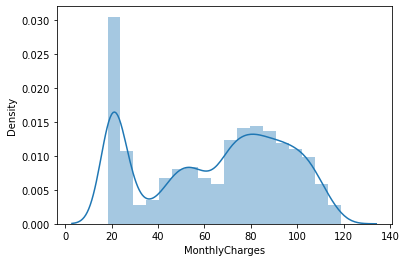

In [46]:
sns.distplot(df['MonthlyCharges'])

 skewness present.

<AxesSubplot:xlabel='Churn', ylabel='Density'>

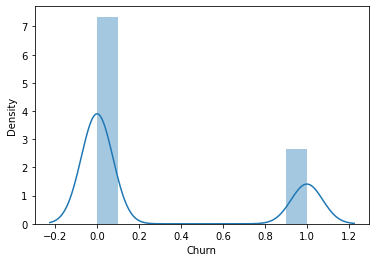

In [47]:
sns.distplot(df['Churn'])

 skewness present.

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='gender'>

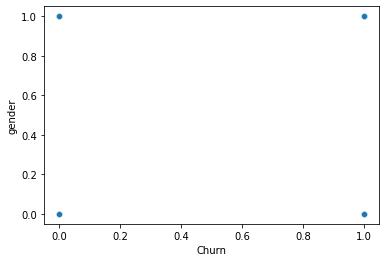

In [50]:
sns.scatterplot(x='Churn',y='gender',data=df)


gender is in range 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

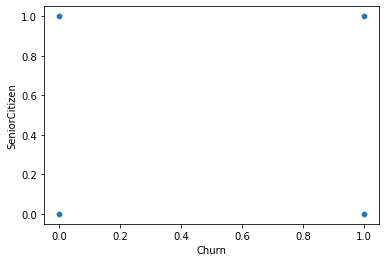

In [51]:
sns.scatterplot(x='Churn',y='SeniorCitizen',data=df)


SeniorCitizen is in the range of 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='Partner'>

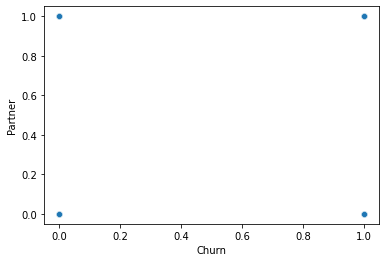

In [52]:
sns.scatterplot(x='Churn',y='Partner',data=df)


partner is in the range of 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='Dependents'>

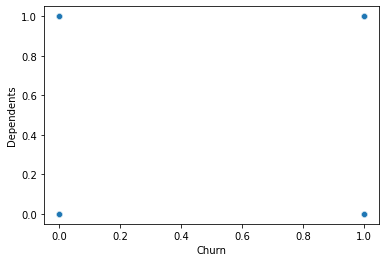

In [53]:
sns.scatterplot(x='Churn',y='Dependents',data=df)


Dependents  is in the range of 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

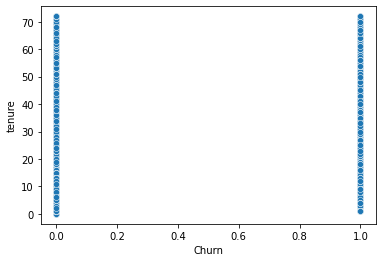

In [54]:
sns.scatterplot(x='Churn',y='tenure',data=df)


tenure is in the range of 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='PhoneService'>

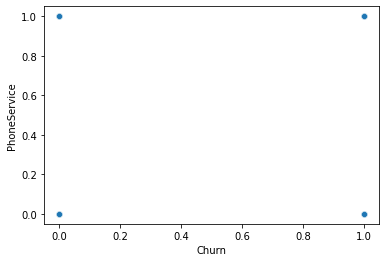

In [55]:
sns.scatterplot(x='Churn',y='PhoneService',data=df)


PhoneService is in the range of 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='MultipleLines'>

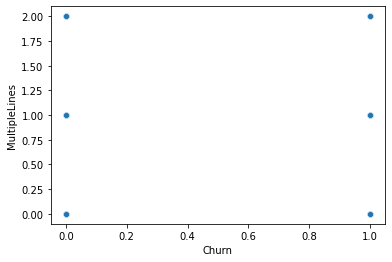

In [56]:
sns.scatterplot(x='Churn',y='MultipleLines',data=df)


MultipleLines is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='InternetService'>

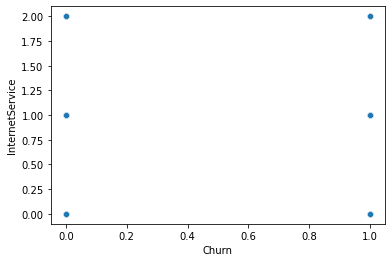

In [57]:
sns.scatterplot(x='Churn',y='InternetService',data=df)


InternetService is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='OnlineSecurity'>

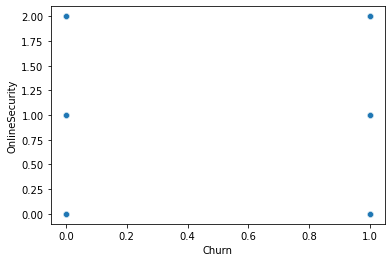

In [58]:
sns.scatterplot(x='Churn',y='OnlineSecurity',data=df)


OnlineSecurity is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='OnlineBackup'>

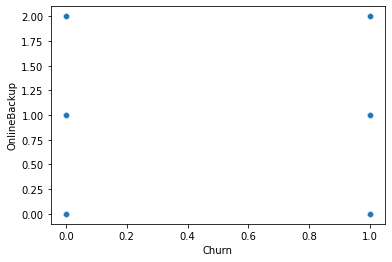

In [59]:
sns.scatterplot(x='Churn',y='OnlineBackup',data=df)


OnlineBackup is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='DeviceProtection'>

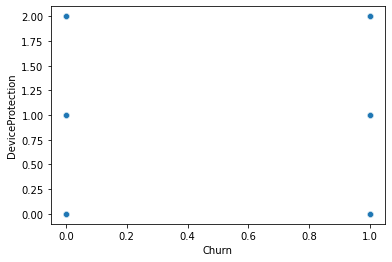

In [60]:
sns.scatterplot(x='Churn',y='DeviceProtection',data=df)


DeviceProtection is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='TechSupport'>

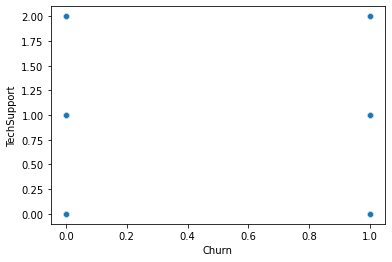

In [61]:
sns.scatterplot(x='Churn',y='TechSupport',data=df)


TechSupport is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

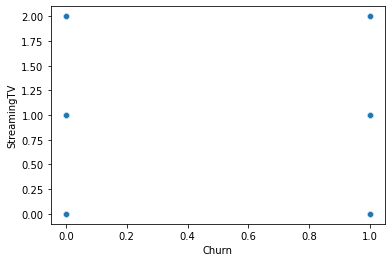

In [62]:
sns.scatterplot(x='Churn',y='StreamingTV',data=df)


StreamingTV is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

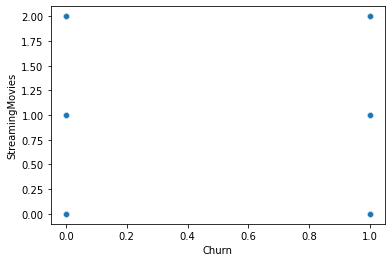

In [63]:
sns.scatterplot(x='Churn',y='StreamingMovies',data=df)


StreamingMovies is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

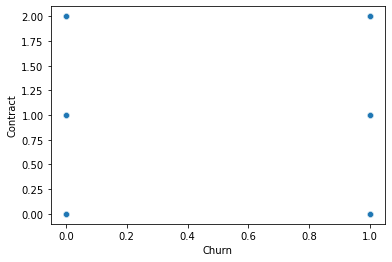

In [64]:
sns.scatterplot(x='Churn',y='Contract',data=df)


Contract is in the range of 0,1,2.

<AxesSubplot:xlabel='Churn', ylabel='PaperlessBilling'>

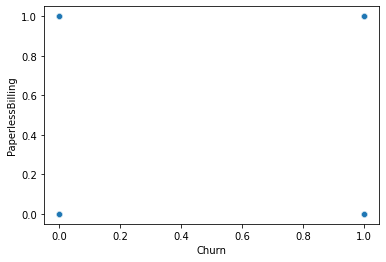

In [65]:
sns.scatterplot(x='Churn',y='PaperlessBilling',data=df)


PaperlessBilling is in the range of 0,1.

<AxesSubplot:xlabel='Churn', ylabel='PaymentMethod'>

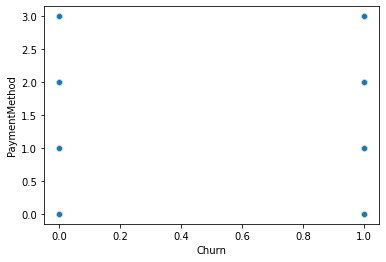

In [66]:
sns.scatterplot(x='Churn',y='PaymentMethod',data=df)


PaymentMethod is in the range of 0,1,2 and 3.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

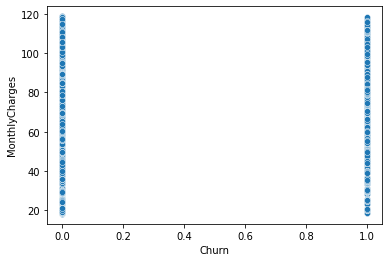

In [67]:
sns.scatterplot(x='Churn',y='MonthlyCharges',data=df)


MonthlyCharges is in the range of 0 and 1.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

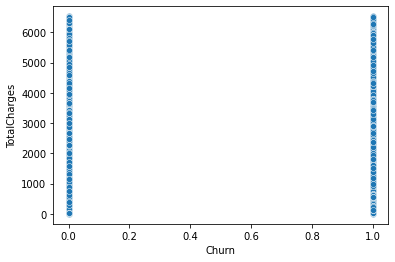

In [68]:
sns.scatterplot(x='Churn',y='TotalCharges',data=df)


TotalCharges is in the range of 0 and 1.

In [3]:
df.columns

NameError: name 'df' is not defined

<AxesSubplot:>

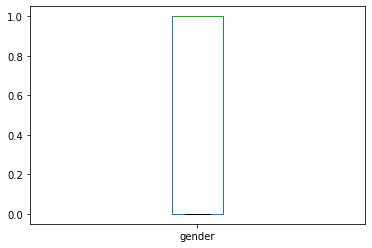

In [71]:
df['gender'].plot.box()

No outliers present.

<AxesSubplot:>

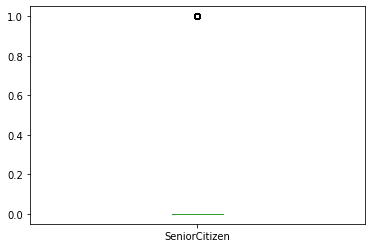

In [72]:
df['SeniorCitizen'].plot.box()

outliers present.

<AxesSubplot:>

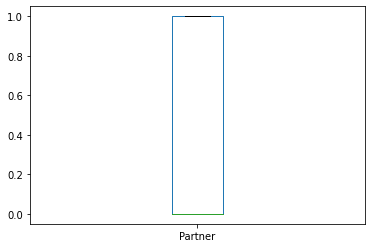

In [73]:
df['Partner'].plot.box()

No outliers present.

<AxesSubplot:>

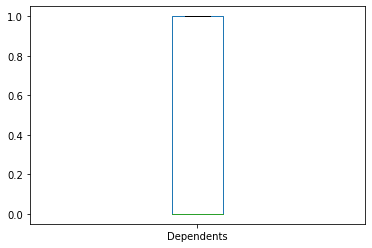

In [74]:
df['Dependents'].plot.box()

No outliers present.

<AxesSubplot:>

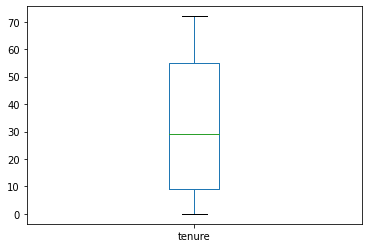

In [75]:
df['tenure'].plot.box()

No outliers present.

<AxesSubplot:>

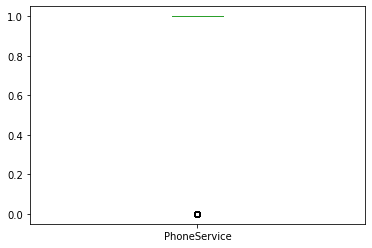

In [76]:
df['PhoneService'].plot.box()

outliers present.

<AxesSubplot:>

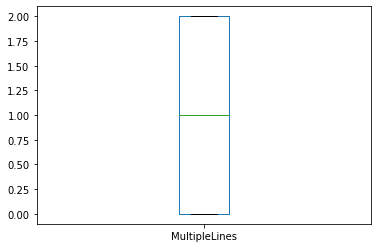

In [77]:
df['MultipleLines'].plot.box()

No outliers present.

<AxesSubplot:>

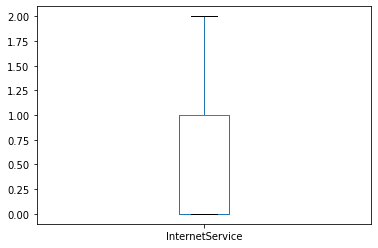

In [78]:
df['InternetService'].plot.box()

No outliers present.

<AxesSubplot:>

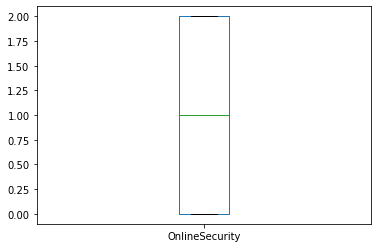

In [79]:
df['OnlineSecurity'].plot.box()

No outliers present.

<AxesSubplot:>

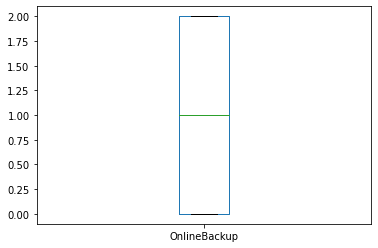

In [80]:
df['OnlineBackup'].plot.box()

No outliers present.

<AxesSubplot:>

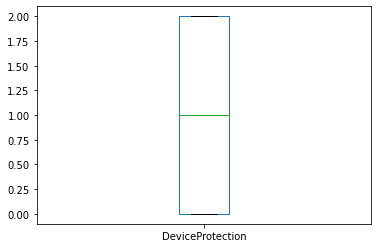

In [90]:
df['DeviceProtection'].plot.box()

No outliers present.

<AxesSubplot:>

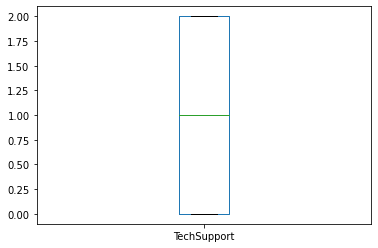

In [82]:
df['TechSupport'].plot.box()

No outliers present.

<AxesSubplot:>

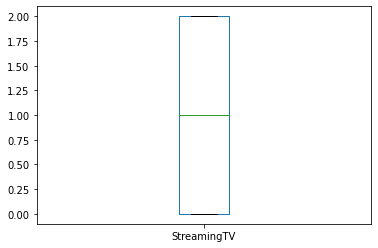

In [83]:
df['StreamingTV'].plot.box()

No outliers present.

<AxesSubplot:>

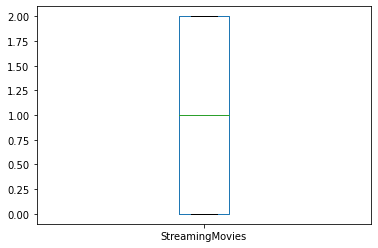

In [84]:
df['StreamingMovies'].plot.box()

No outliers present.

<AxesSubplot:>

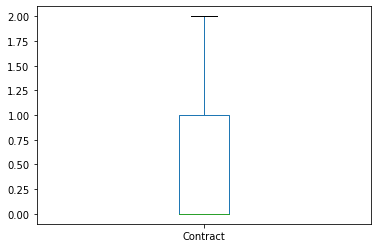

In [85]:
df['Contract'].plot.box()

No outliers present.

<AxesSubplot:>

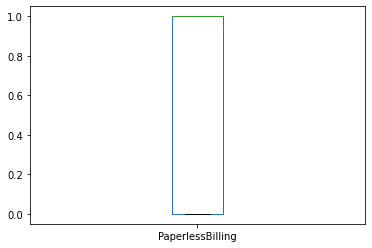

In [86]:
df['PaperlessBilling'].plot.box()

No outliers present.

<AxesSubplot:>

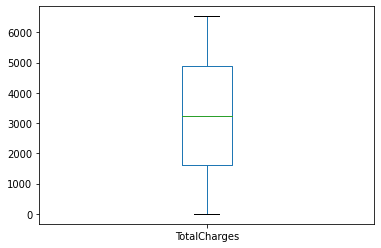

In [87]:
df['TotalCharges'].plot.box()

No outliers present.

<AxesSubplot:>

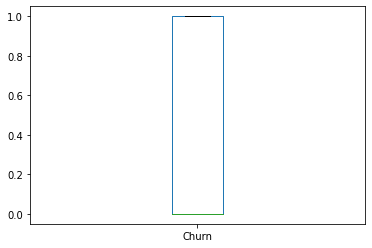

In [88]:
df['Churn'].plot.box()

No outliers present.

# Removing Outliers

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [92]:
df_new=df[(z<3).all(axis=1)]

In [93]:
df_new.shape

(6361, 20)

In [94]:
df.shape

(7043, 20)

7043-6361=682 outliers removed from dataset.

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [125]:
x=df_new.iloc[:,0:-1]

In [126]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,770
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [127]:
y=df_new.iloc[:,19]

In [128]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [133]:
def get_score(m):
    max_score=0
    max_i=0
    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        if(acc_score>max_score):
            max_score=acc_score
            max_i=i
    print(m)
    print("max accuracy score:",max_score)
    print("max i:",max_i)
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
list=[lr,dt]
for var in list:
    get_score(var)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
max accuracy score: 0.8223809523809524
max i: 41
confusion matrix: [[1400  159]
 [ 258  283]]
classification report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1559
           1       0.64      0.52      0.58       541

    accuracy                           0.80      2100
   macro avg       0.74      0.71      0.72      2100
weighted avg       0.79      0.80      0.79      2100

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                 

# Cross validation

In [137]:
score=cross_val_score(lr,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.80088009 0.80748075 0.80638064 0.78877888 0.80418042 0.80947137
 0.80947137]
0.8038062144792202 0.006748976840109119


In [138]:
score=cross_val_score(dt,x,y,cv=7)
print(score)
print(score.mean(),score.std())

[0.73377338 0.74587459 0.72387239 0.73157316 0.72827283 0.73017621
 0.72687225]
0.7314878278262061 0.006585318746267965


# AUC ROC Curve

In [142]:
from sklearn.metrics import roc_curve,roc_auc_score

In [143]:
y_pred_proba=dt.predict_proba(x_test)[:,0]

In [144]:
y_pred_proba

array([1., 1., 1., ..., 1., 1., 1.])

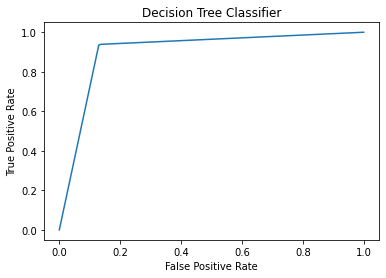

0.9010372909326027

In [147]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier")
plt.show()
pred=dt.predict(x_test)
auc_score=roc_auc_score(y_test,pred)
auc_score

# Grid Search CV

In [148]:
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['gini','entropy']}
GSC=GridSearchCV(dt,parameter,cv=5,scoring='accuracy')
GSC.fit(x,y)
print(GSC.best_params_)
print(GSC.best_score_)

{'criterion': 'entropy'}
0.7302310957396636


logistic regression is the best model as the difference between crossvalidation score and model is minimum.

# Ensemble Techniques

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8071428571428572
[[1394  143]
 [ 262  301]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1537
           1       0.68      0.53      0.60       563

    accuracy                           0.81      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.80      0.81      0.80      2100



In [150]:
from sklearn.ensemble import AdaBoostClassifier

ab=AdaBoostClassifier(n_estimators=100,random_state=42)
#by default n_estimators=100
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8138095238095238
[[1381  156]
 [ 235  328]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1537
           1       0.68      0.58      0.63       563

    accuracy                           0.81      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.81      0.81      0.81      2100



# Saving the Model

In [139]:
import joblib
joblib.dump(lr,'customer.obj')

['customer.obj']

In [140]:
file=joblib.load('customer.obj')
file.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1])